In [ ]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
df = pd.read_csv("/content/eeg-eye-state.csv")
df.head()

,AF3,F7,F3,FC5,T7,P,O1,O2,P8,T8,FC6,F4,F8,AF4,class
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0


In [ ]:
# basic exploration
print("Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())
print("\nTarget distribution:\n", df["class"].value_counts())

Shape: (14980, 15)

Missing Values:
 AF3      0
F7       0
F3       0
FC5      0
T7       0
P        0
O1       0
O2       0
P8       0
T8       0
FC6      0
F4       0
F8       0
AF4      0
class    0
dtype: int64

Target distribution:
 class
0    8257
1    6723
Name: count, dtype: int64


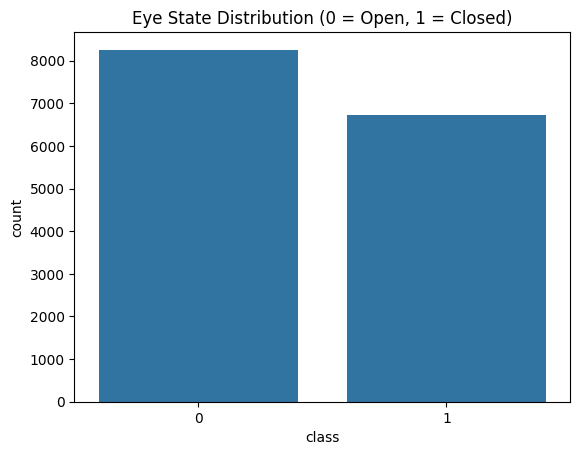

In [ ]:
# class Distribution plot
sns.countplot(x="class", data=df)
plt.title("Eye State Distribution (0 = Open, 1 = Closed)")
plt.show()


In [ ]:
# Separate features X and target y.
X = df.drop("class", axis=1)
y = df["class"]


In [ ]:
# Apply Standard Scaling to features.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
# Initialize model
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)


In [ ]:

# Train model
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# predict
y_pred = rf_model.predict(X_test)


Accuracy: 0.9305740987983978


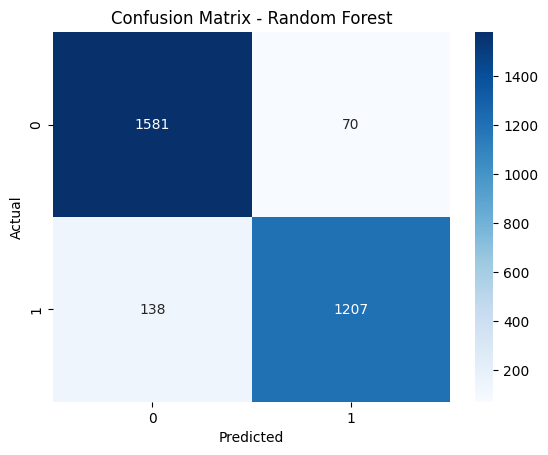

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1651
           1       0.95      0.90      0.92      1345

    accuracy                           0.93      2996
   macro avg       0.93      0.93      0.93      2996
weighted avg       0.93      0.93      0.93      2996



In [ ]:
# Print:
#  Accuracy
#  Confusion Matrix
#  Classification Re

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

print(classification_report(y_test, y_pred))
